### Sprint 10  Aprenentage Supervisat  Classificació - part 1

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import classification_report
from sklearn import metrics

First I will open a dataframe that has already data cleaned from previous exercises. 

In [2]:
# open dataset from the previous exercise 
# this file has data cleaned (we handled missing values and droped non useful columns, explained in oprevious exercise)
# this file does not have yet dummy columns, I will generate them later before doing the regressions 
data = pd.read_csv('data.csv')
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
0,-14.0,128.0,150.0,116.0,8.0,810,418.97,4.0,8.0,0.0,0.0,0.0,0.0,0.0,2003.0,1955,2211.0,2225,1,3,4,WN,IAD,TPA
1,2.0,128.0,145.0,113.0,19.0,810,430.09,5.0,10.0,0.0,0.0,0.0,0.0,0.0,754.0,735,1002.0,1000,1,3,4,WN,IAD,TPA
2,14.0,96.0,90.0,76.0,8.0,515,406.58,3.0,17.0,0.0,0.0,0.0,0.0,0.0,628.0,620,804.0,750,1,3,4,WN,IND,BWI
3,34.0,90.0,90.0,77.0,34.0,515,401.30,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1829.0,1755,1959.0,1925,1,3,4,WN,IND,BWI
4,11.0,101.0,115.0,87.0,25.0,688,474.48,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1940.0,1915,2121.0,2110,1,3,4,WN,IND,JAX


This dataset is already cleaned from previous exercise. Because of memory issues and due to the large dataset, I'm having trouble performing the models, so I will select a sample of the dataset consisting of the 10% of the observations. I will stratify by UniqueCarrier to have a good representation of all Carriers.

In [3]:
data_sample = data.groupby('UniqueCarrier', group_keys= False).apply(lambda x : x.sample(frac=0.1, random_state = 0))

### - Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

First, we will create a new column to categorize 'ArrDelay', we will create two classes:

+ 0: The fligth was on time, measured on Arrival, ArrDelay <= 0
+ 1: The flight had delay, measured on Arrival, ArrDelay > 0

For this exercise: 

+ 0 will represent negatives (flights on time) 
+ 1 will represent positives (flights on delay)

In [4]:
def delay_class(x): 
    if x <= 0: 
        return 0
    else: 
        return 1
    
data_sample['Class'] = data_sample['ArrDelay'].apply(delay_class)

In [5]:
data_sample.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Class
143019,21.0,95.0,88.0,63.0,14.0,364,346.67,11.0,21.0,14.0,0.0,7.0,0.0,0.0,1711.0,1657,1746.0,1725,1,18,5,9E,DTW,EVV,1
1886001,24.0,139.0,126.0,105.0,11.0,813,464.57,18.0,16.0,0.0,0.0,13.0,0.0,11.0,1100.0,1049,1419.0,1355,12,5,5,9E,AUS,ATL,1
1881989,2.0,86.0,102.0,65.0,18.0,490,452.31,9.0,12.0,0.0,0.0,0.0,0.0,0.0,943.0,925,1209.0,1207,12,22,1,9E,RAP,MSP,1
1030789,37.0,114.0,90.0,87.0,13.0,442,304.83,4.0,23.0,13.0,0.0,24.0,0.0,0.0,1908.0,1855,2102.0,2025,6,12,4,9E,MEM,MLI,1
687997,10.0,90.0,88.0,61.0,8.0,382,375.74,7.0,22.0,0.0,0.0,0.0,0.0,0.0,1038.0,1030,1208.0,1158,4,1,2,9E,DTW,ROA,1


Now we will change the order of the columns: 

In [7]:
# choose the order we want 
cols = ['Class','ArrDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'Speed', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth',
       'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']
data_sample = data_sample[cols]
data_sample.head()

,Class,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
143019,1,21.0,95.0,88.0,63.0,14.0,364,346.67,11.0,21.0,14.0,0.0,7.0,0.0,0.0,1711.0,1657,1746.0,1725,1,18,5,9E,DTW,EVV
1886001,1,24.0,139.0,126.0,105.0,11.0,813,464.57,18.0,16.0,0.0,0.0,13.0,0.0,11.0,1100.0,1049,1419.0,1355,12,5,5,9E,AUS,ATL
1881989,1,2.0,86.0,102.0,65.0,18.0,490,452.31,9.0,12.0,0.0,0.0,0.0,0.0,0.0,943.0,925,1209.0,1207,12,22,1,9E,RAP,MSP
1030789,1,37.0,114.0,90.0,87.0,13.0,442,304.83,4.0,23.0,13.0,0.0,24.0,0.0,0.0,1908.0,1855,2102.0,2025,6,12,4,9E,MEM,MLI
687997,1,10.0,90.0,88.0,61.0,8.0,382,375.74,7.0,22.0,0.0,0.0,0.0,0.0,0.0,1038.0,1030,1208.0,1158,4,1,2,9E,DTW,ROA


In [8]:
data_sample.shape

(192825, 25)

In [9]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192825 entries, 143019 to 1544585
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Class              192825 non-null  int64  
 1   ArrDelay           192825 non-null  float64
 2   ActualElapsedTime  192825 non-null  float64
 3   CRSElapsedTime     192825 non-null  float64
 4   AirTime            192825 non-null  float64
 5   DepDelay           192825 non-null  float64
 6   Distance           192825 non-null  int64  
 7   Speed              192825 non-null  float64
 8   TaxiIn             192825 non-null  float64
 9   TaxiOut            192825 non-null  float64
 10  CarrierDelay       192825 non-null  float64
 11  WeatherDelay       192825 non-null  float64
 12  NASDelay           192825 non-null  float64
 13  SecurityDelay      192825 non-null  float64
 14  LateAircraftDelay  192825 non-null  float64
 15  DepTime            192825 non-null  float64
 

In [9]:
# now we can drop 'ArrDelay' column: 
data_sample.drop('ArrDelay', axis = 1, inplace= True)

Now I will generate the dummy column for the categorical variables. In last exercise we saw that categorical features are not so important for the predicitions of our models, so I will only leave one categorical feature : CarrierDelay. I will drop Origin and Dest since they generate a lot of columns and are not so useful for doing the predictions.

+ We have a column that measures the Distance of the flight, so we will drop 'Origin' and 'Dest' columns.
+ The average time of delay varies widely depending on the Carrier (we saw that in our Exploratory Analysis in previous exercise), so we will keep this column. 

In [10]:
 data_sample.drop(['Origin', 'Dest'], axis = 1, inplace= True )

In [11]:
# save this file for next exercise!!
data_sample.head()

,Class,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier
143019,1,95.0,88.0,63.0,14.0,364,346.67,11.0,21.0,14.0,0.0,7.0,0.0,0.0,1711.0,1657,1746.0,1725,1,18,5,9E
1886001,1,139.0,126.0,105.0,11.0,813,464.57,18.0,16.0,0.0,0.0,13.0,0.0,11.0,1100.0,1049,1419.0,1355,12,5,5,9E
1881989,1,86.0,102.0,65.0,18.0,490,452.31,9.0,12.0,0.0,0.0,0.0,0.0,0.0,943.0,925,1209.0,1207,12,22,1,9E
1030789,1,114.0,90.0,87.0,13.0,442,304.83,4.0,23.0,13.0,0.0,24.0,0.0,0.0,1908.0,1855,2102.0,2025,6,12,4,9E
687997,1,90.0,88.0,61.0,8.0,382,375.74,7.0,22.0,0.0,0.0,0.0,0.0,0.0,1038.0,1030,1208.0,1158,4,1,2,9E


In [13]:
# save this file to use in the second exercise 
# data_sample.to_csv('data_sample.csv', index = False)

In [12]:
# generate dummy columns for UniqueCarrier 
# we´ll use the param drop first = True so we don t have duplicated information 

data_sample= pd.get_dummies(data = data_sample, columns = ['UniqueCarrier'], 
                            drop_first= True)

In [13]:
data_sample.shape

(192825, 40)

Like Regression models, classification models are also affected by multicollinearity. In this exercise we will eliminate the variables that are highly correlated between each other (we already did the multicollinearity analysis in the previous exercise, Sprint 9, we will use the same variables as in that exercise). 

In [14]:
data_cleaned = data_sample.copy()

In [15]:
data_cleaned.drop(['ActualElapsedTime', 'TaxiIn', 'LateAircraftDelay', 'CRSElapsedTime', 'CRSDepTime', 'AirTime',
                   'CRSArrTime', 'Speed', 'DepTime'], axis = 1, inplace = True)
data_cleaned.shape

(192825, 31)

In [26]:
data_cleaned.head()

,Class,DepDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,ArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
143019,1,14.0,364,21.0,14.0,0.0,7.0,0.0,1746.0,1,18,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1886001,1,11.0,813,16.0,0.0,0.0,13.0,0.0,1419.0,12,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1881989,1,18.0,490,12.0,0.0,0.0,0.0,0.0,1209.0,12,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1030789,1,13.0,442,23.0,13.0,0.0,24.0,0.0,2102.0,6,12,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
687997,1,8.0,382,22.0,0.0,0.0,0.0,0.0,1208.0,4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we can proceed with the exercise. 

#### Model 1: Logistic Regression

First, we will test a model of Logistic Regression with the data as we have it in this moment. 

In [18]:
# choose dependent and independent variables 
y = data_cleaned['Class']
X = data_cleaned.drop(['Class'], axis = 1)

In [19]:
print('data_cleaned.shape: ', data_cleaned.shape)
print('y.shape: ', y.shape)
print('X.shape', X.shape)

data_cleaned.shape:  (192825, 31)
y.shape:  (192825,)
X.shape (192825, 30)


In [20]:
# test size 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

In [30]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (134977, 30)
X_test.shape:  (57848, 30)
y_train.shape:  (134977,)
y_test.shape:  (57848,)


In [31]:
from sklearn.linear_model import LogisticRegression
# USE RANDOM STATE
lr = LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

LogisticRegression(random_state=12)

In [32]:
# predictions on test set: 
lr_pred = lr.predict(X_test)

Now let´s check how the confusion matrix looks like: 

In [34]:
cm_lr = confusion_matrix(y_test, lr_pred)
cm_lr

array([[ 1595,  4382],
       [ 1061, 50810]], dtype=int64)

In [41]:
# create a function that prints results: 
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1][1]
    FP = cm[0][1]
    TN = cm[0][0]
    FN = cm[1][0]
    
    print('True positive = ', TP )
    print('False positive = ', FP )
    print('True negative = ', TN )
    print('False negative = ', FN )  
    
# create function to show results 
def cm_results(y_true,y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1][1]
    FP = cm[0][1]
    TN = cm[0][0]
    FN = cm[1][0]
    
    return TP, FP, TN, FN 
    

In [42]:
print_confusion_matrix(y_test, lr_pred)

True positive =  50810
False positive =  4382
True negative =  1595
False negative =  1061


We have 52405 correct results and 5443 wrong results. 

Once we have the confusion matrix we can calculate some of the most important metrics used to evaluate Classification methods: accuracy, precision, recall and f1-score. 

In [46]:
TP , FP, TN, FN = (cm_results(y_test, lr_pred)[0], cm_results(y_test, lr_pred)[1], cm_results(y_test, lr_pred)[2], 
                   cm_results(y_test, lr_pred)[3])
# calculate accuracy 
accuracy = (TP+TN)/(TP+FP+FN+TN)
# precision 
precision = TP/(TP+FP)
# recall (or sensitivity)
recall = TP/(TP+FN)
# f1 score 
f1_score = 2*(recall * precision) / (recall + precision)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1-score: ', f1_score)

accuracy:  0.9059085880237865
precision:  0.920604435425424
recall:  0.979545410730466
f1-score:  0.9491607744972586


+ The metrics look good but it's not that simple. We see that in the confusion matrix the number of False Positives is higher than the number of True Negatives, which means that from Class 0 (on-time flights) we are getting more than half of the predictions wrong (in our model, much more than 50% (4382 False Positives against 1595 True Negatives).


+ Furthermore, we must take into account that if we were to build a model that always predicts Class 1 (Flights on Delay), the metrics would also be high (apparently good).



Let's check this out, we are going to generate a model that always predicts 1 (majority Class): 

In [47]:
y_test.value_counts()

1    51871
0     5977
Name: Class, dtype: int64

In our 'Blind Model', the predictions will always be 1 : 

In [50]:
# generate a result of only 1 (predicting the majority class): 
y_blind_predictor = np.ones(len(y_test))

In [51]:
# lets check confsusion matrix of this 'blind model': 
cm_blind = confusion_matrix(y_test, y_blind_predictor)
cm_blind

array([[    0,  5977],
       [    0, 51871]], dtype=int64)

In [52]:
print_confusion_matrix(y_test, y_blind_predictor)

True positive =  51871
False positive =  5977
True negative =  0
False negative =  0


In [54]:
# check results 
TP , FP, TN, FN = (cm_results(y_test, y_blind_predictor)[0], cm_results(y_test, y_blind_predictor)[1], 
                   cm_results(y_test, y_blind_predictor)[2], cm_results(y_test, y_blind_predictor)[3])

accuracy = (TP+TN)/(TP+FP+FN+TN)
# precision 
precision = TP/(TP+FP)
# recall (or sensitivity)
recall = TP/(TP+FN)
# f1 score 
f1_score = 2*(recall * precision) / (recall + precision)

print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('f1-score: ', f1_score)

accuracy:  0.8966774996542664
precision:  0.8966774996542664
recall:  1.0
f1-score:  0.9455244761618316


+ Looking at this it seems that there is not much difference with the previous model and in reality what we are doing is saying all the time that the flight will be delayed. 
+ What is happening is that the classes we want to predict are not balanced, so in our case we would like to find a model that is well balanced. 
+ To do this, we can look for a model that has a balance between false positives and false negatives (balance between Type I error and Type II error). 
+ In our Logistic Regression model we see that the value of False Positives is very high (Type I error) and we would like to improve this (we can try to increase the precision). 
+ Although the f1 score is like a weighted metric between recall and precision and can allow us to compare different models, we need to take into account more general factors to evaluate our model for the type of data we have (we see that in our blind model the f1 score is 0.945 and we are not really predicting anything!!!). 

#### Generating metrics with sklearn 

We have done the calculations by hand to better understand how the metrics work but sklearn does it for us: 

In [33]:
# generate a function to print and get results 

# make a function to print different metrics 
def print_results(true, predicted): 
    accuracy = accuracy_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    f1score = f1_score(true, predicted)
    
    
    print('Accuracy : ', accuracy)
    print('Recall (or sensitivity): ', recall)
    print('Precision : ', precision)
    print('F1 score: ', f1score)

In [34]:
# make a function to store results to a dataframe 
def get_results(true, predicted): 
    accuracy = accuracy_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    f1score = f1_score(true, predicted)
    
    return accuracy, recall, precision, f1score

In [40]:
print_results(y_test, lr_pred)

Accuracy :  0.9059085880237865
Recall (or sensitivity):  0.979545410730466
Precision :  0.920604435425424
F1 score:  0.9491607744972586


The results are the same as those we have calculated ourselves. 

We can also draw the ROC/AUC curve and see its result. The ROC curve shows the trade-off between sensitivity/ recall (or TPR) and specificity (1 – FPR). The score is a value between 0.0 and 1.0 for a perfect classifier.

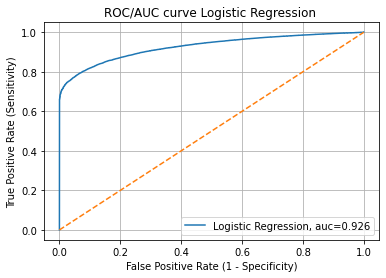

In [43]:
# let's draw our roc/auc curve
lr_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_pred_proba)
auc_lr = metrics.roc_auc_score(y_test, lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(round(auc_lr, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve Logistic Regression '); 

In our curve we see that the result is not perfect (it does not cover the whole area) but it is a better result than in our blind model (roc auc score is 0.926). 

In [44]:
# store the results 
results_df = pd.DataFrame(data= [['Logistic Regression',  get_results(y_test, lr_pred)[0],
                                  get_results(y_test, lr_pred)[1],  get_results(y_test, lr_pred)[2], 
                                  get_results(y_test, lr_pred)[3], auc_lr]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])

results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043


Altough the model seems to have good results it does not predict class 0 very well (minority class), we can try to balance our dataset and then try the model again.

#### Logistic Regression with balanced classes

To try to solve the problem of the low prediction of the minority class (highh Type I Error) we can do a class balancing.  Let's see what is the percentage of each class in the dataset: 

In [47]:
data_cleaned.Class.value_counts(normalize= True)

1    0.894386
0    0.105614
Name: Class, dtype: float64

We got a disimbalanced dataset, 89 % of the flights are on delay and only 11 % are on time.

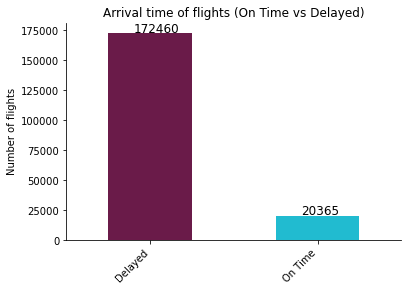

In [48]:
# plot this result 
ax = data_cleaned.Class.value_counts().plot(kind = 'bar', figsize = (6,4), color = ['#6a1b49','#21bbd0'])
ax.set_title('Arrival time of flights (On Time vs Delayed)', fontsize = 12)
ax.set_ylabel('Number of flights', fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabels = ['Delayed', 'On Time']
ax.set_xticklabels(xlabels, rotation=45, ha='right')
for i in ax.patches: 
    ax.text(i.get_x()+0.15, i.get_height() + 700, str(round(i.get_height(), 2 )), fontsize = 12)

If we want our model to make better predicitions for the minority class, we can try to balance the classes. To avoid causing a major distorsion on the data we can use a double approach: 

+ First we will use SMOTE to oversample our minority class
+ Then we will undersample our majority class using RandomUnderSampler

This resamplings will only apply to the train subset: 

In [49]:
# do all the steps through a pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

 # we increase minority class from 10% to 20% 
over = SMOTE(sampling_strategy= 0.20)
# we accept the minoriyty class to be 70 % of the majority, i f we use  a larger percentage, we will be 
# missing a lot of data
under = RandomUnderSampler(sampling_strategy= 0.70) 

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps = steps)

# we will only apply this to our train set
X_train_sm ,y_train_sm = pipeline.fit_resample(X_train, y_train)

In [50]:
y_train_sm.value_counts()

1    34452
0    24117
Name: Class, dtype: int64

In [51]:
y_train_sm.value_counts(normalize = True)

1    0.588229
0    0.411771
Name: Class, dtype: float64

Now we have 59% of observations for class 1 (Delayed Flights) and 41% of observations for Class 0 (Flights on Time). 

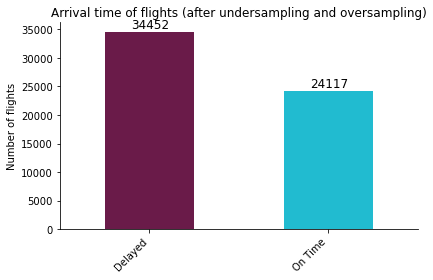

In [52]:
# plot this result 
ax = y_train_sm.value_counts().plot(kind = 'bar', figsize = (6,4), color = ['#6a1b49','#21bbd0'])
ax.set_title('Arrival time of flights (after undersampling and oversampling)', fontsize = 12)
ax.set_ylabel('Number of flights', fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabels = ['Delayed', 'On Time']
ax.set_xticklabels(xlabels, rotation=45, ha='right')

for i in ax.patches: 
    ax.text(i.get_x()+0.15, i.get_height() + 700, str(round(i.get_height(), 2 )), fontsize = 12)
plt.tight_layout(); 

Now our dataset doesn't look so disimbalanced, we will do again our Logistic Regression model using our resampled train subset. 

In [53]:
lr_sm = LogisticRegression(random_state=12)
lr_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=12)

In [54]:
# predictions on test set: 
lr_sm_pred = lr_sm.predict(X_test)

print_results(y_test, lr_sm_pred)

Accuracy :  0.823139952980224
Recall (or sensitivity):  0.8137494939368819
Precision :  0.9866760168302945
F1 score:  0.8919081679010259


In [55]:
# ceck confusion matrix 
cm_lr_sm = confusion_matrix(y_test, lr_sm_pred)
cm_lr_sm

array([[ 5407,   570],
       [ 9661, 42210]], dtype=int64)

+ We have reduced the Type I Error (false positives) 


+ Out of 5977 flights on time we have correctly predicted 5407


+ In the case of delayed flights, we have predicted correctly 42210 (out of 51871)


+ The cost of improving the predictions for the minority class (Class 0) has been that False Positives have increased considerably. It seems that by taking more into account the minority class we have lost predictive power in Class 1 (Type II error has increased). 

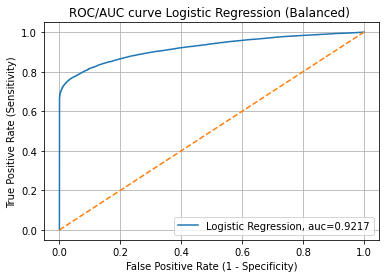

In [57]:
# let's draw our roc/auc curve
lr_sm_pred_proba = lr_sm.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_sm_pred_proba)
auc_lr_sm = metrics.roc_auc_score(y_test, lr_sm_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(round(auc_lr_sm, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve Logistic Regression (Balanced) '); 

The ROC AUC score has decreased a little compared to our last model but the difference is very small. 

In [58]:
# store the results 
lr_sm_results = pd.DataFrame(data = [['Logistic Regression (Balanced)', get_results(y_test, lr_sm_pred)[0], 
                                     get_results(y_test, lr_sm_pred)[1], get_results(y_test, lr_sm_pred)[2], 
                                     get_results(y_test, lr_sm_pred)[3], auc_lr_sm]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])
results_df = pd.concat([results_df, lr_sm_results])
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749


+ We have increased our Precision: out of all the flights we have predicted delay, how many predicitions are true. 
+ The Recall has decreased: of all of the flights with delay, how many of them did we correctly predict. 
+ Accuracy has decreased a lot, but we cannot rely on Accuracy only because it does not say very much about the power of prediction of our model (if we only predict class 1 we would be right 89 % of the times)
+ We can compare the models usinf F1 score and ROC AUC score, in our balanced model they have dicreased a little, we would have to evaluate if we are more interested in maximixing Recall or Precision for our predictions. 

#### Model 2: AdaBoost using our balanced classes 

We have used SMOTE and RandomUndersampler to balance our data. Now we can apply our balanced dataset to AdaBoost model: 

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_sm = AdaBoostClassifier(random_state=0)

ada_sm.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(random_state=0)

In [61]:
ada_sm_pred = ada_sm.predict(X_test)

print_results(y_test, ada_sm_pred)

Accuracy :  0.8453187664223483
Recall (or sensitivity):  0.8427637793757591
Precision :  0.982205046397196
F1 score:  0.9071572350536429


In [62]:
# confusion matrix 
cm_ada_sm = confusion_matrix(y_test, ada_sm_pred)
cm_ada_sm

array([[ 5185,   792],
       [ 8156, 43715]], dtype=int64)

+ In this model we have improved f1 score a little
+ False negatives have dicreased a little but they are still very high.
+ False positives : 792
+ False negatives : 8156

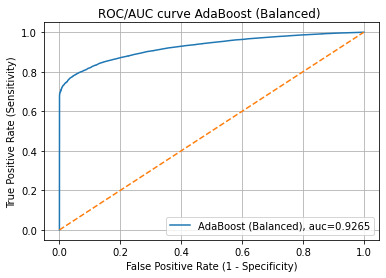

In [63]:
# let's draw our roc/auc curve
ada_sm_pred_proba = ada_sm.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  ada_sm_pred_proba)
auc_ada_sm = metrics.roc_auc_score(y_test, ada_sm_pred_proba)
plt.plot(fpr,tpr,label="AdaBoost (Balanced), auc="+str(round(auc_ada_sm, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve AdaBoost (Balanced) '); 

ROC AUC score has increased a little and now is higher than in our previous models.

In [64]:
# store the results 
ada_results = pd.DataFrame(data = [['AdaBoost (Balanced)', get_results(y_test, ada_sm_pred)[0], 
                                   get_results(y_test, ada_sm_pred)[1], get_results(y_test, ada_sm_pred)[2], 
                                   get_results(y_test, ada_sm_pred)[3], auc_ada_sm]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])
results_df = pd.concat([results_df, ada_results])
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512


Since we have balanced the classes our accuracy has increased but at the cost of lowering recall considerably. Also the f1 score is still a bit low compared to our first unbalanced model.

#### Model 3:  BalancedBaggingClassifier using Random Forest 

To fix the imbalance of the classes we can also use: BalancedBaggingClassifier from imblearn library. It allows the resampling of each subset of the dataset before training each estimator of the ensemble. In this case we will use Randon Forest as an estimator. 

In this model we will use X_train and y_train without being balanced, BalancedBagginClassifier does the balance automatically. 

In [66]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

balanced = BalancedBaggingClassifier(base_estimator= RandomForestClassifier(random_state=0), sampling_strategy= 'auto', 
                                    replacement= False, random_state=0)
# fit model on X_train and y_train
balanced.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(random_state=0),
                          random_state=0)

In [67]:
balanced_pred = balanced.predict(X_test)
print_results(y_test, balanced_pred)

Accuracy :  0.8291557184345181
Recall (or sensitivity):  0.8173931483873456
Precision :  0.9903994393833216
F1 score:  0.8956179170055237


In [68]:
# confusion matrix 
cm_balanced = confusion_matrix(y_test, balanced_pred)
cm_balanced

array([[ 5566,   411],
       [ 9472, 42399]], dtype=int64)

+ We observe that precision has increased compared to our Logistic Regression model with the balanced classes and recall has worsened a little. 
+ False positives are now the lowest
+ On the other hand, false negatives have risen considerably

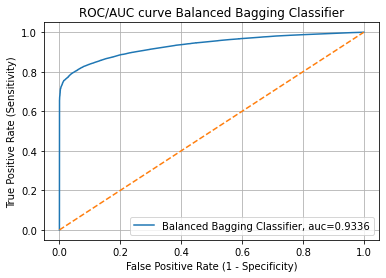

In [69]:
# let's draw our roc/auc curve
balanced_pred_proba = balanced.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  balanced_pred_proba)
auc_balanced = metrics.roc_auc_score(y_test, balanced_pred_proba)
plt.plot(fpr,tpr,label="Balanced Bagging Classifier, auc="+str(round(auc_balanced, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve Balanced Bagging Classifier'); 

ROC AUC score result is the highest one we have seen so far. 

In [70]:
# store the results 
balanced_results = pd.DataFrame(data = [['Balanced Bagging Classifier', get_results(y_test, balanced_pred)[0], 
                                        get_results(y_test, balanced_pred)[1], get_results(y_test, balanced_pred)[2], 
                                        get_results(y_test, balanced_pred)[3], auc_balanced]], columns = ['Model', 
                                        'Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])
results_df = pd.concat([results_df, balanced_results])
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588


+ With this classifier, our precision has increased an Recall has dicreased. 
+ The f1 score is still low (compared with Logistic Regression). 
+ When balancing the classes, either manually or directly through the model, the precision goes up and the recall goes down, but the overall model output (f1 score) is impaired.


### - Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

With the results_df we have created we can plot the results to compare different metrics for the different models: 

In [72]:
plot_results = results_df.set_index('Model')
plot_results

,Accuracy,Recall,Precision,f1-score,ROC AUC Score
Model,,,,,
Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588


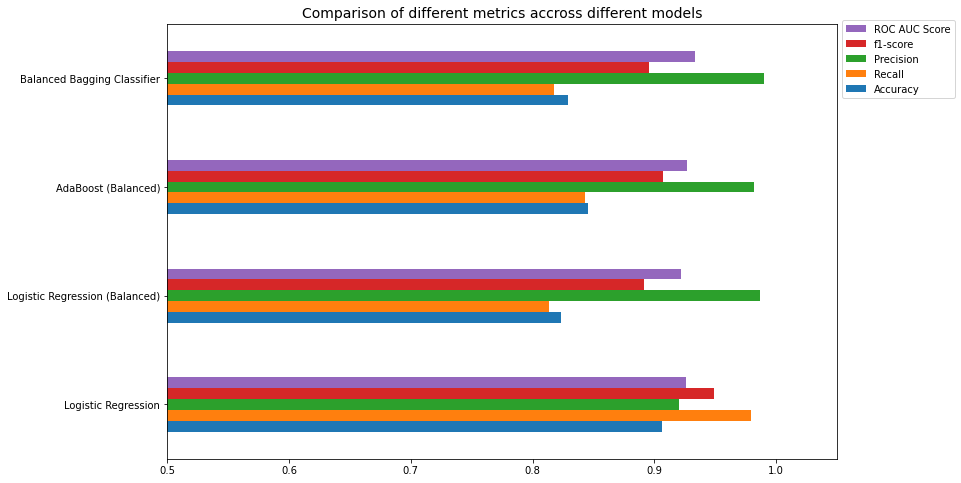

In [74]:
ax = plot_results[['Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score']].plot(kind='barh', figsize=(12, 8))
ax.set_title('Comparison of different metrics accross different models', fontsize = 14)
ax.set_ylabel('')
ax.set_xlim([0.5, 1.05])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

+ Logistic Regression is the model that has by far the highest F1 score, but at the cost of having a very low precision compared to other models. 

+ The rest of the models in which we have either balanced classes using balancing techniques or using algorithms that deal with unbalancing give worse F1 results but improve precision. 

We can also plot confusion matrix next to each other to see their differences: 

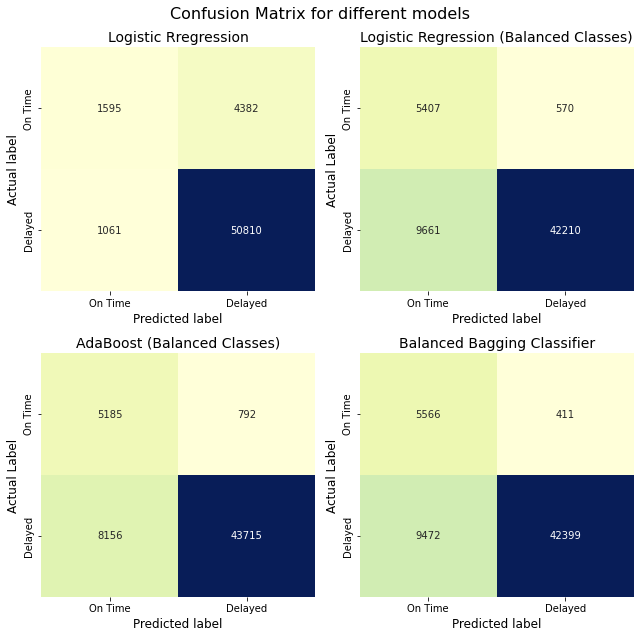

In [75]:
plt.figure(figsize = (9, 9))
plt.suptitle('Confusion Matrix for different models', fontsize = 16)
labels = ['On Time', 'Delayed']

plt.subplot(2,2,1)
sns.heatmap(pd.DataFrame(cm_lr), annot = True ,fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Logistic Rregression', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

plt.subplot(2,2,2)
sns.heatmap(pd.DataFrame(cm_lr_sm), annot = True ,fmt='g', cbar = False,  cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Logistic Regression (Balanced Classes)',  fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

plt.subplot(2,2,3)
sns.heatmap(pd.DataFrame(cm_ada_sm), annot = True, fmt='g', cbar = False,  cmap="YlGnBu" , xticklabels= labels, 
            yticklabels= labels)
plt.title('AdaBoost (Balanced Classes)', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

plt.subplot(2,2,4)
sns.heatmap(pd.DataFrame(cm_balanced), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Balanced Bagging Classifier', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

plt.tight_layout()

+ We have already seen that our first Logistic Regression model (unbalanced) has the best F1 score result, but at the cost of giving very poor results for flights arriving on time: out of 5977 flights arriving on time it only correctly predicts 1595. 

+ The other models perform better in this respect (they have fewer False Positives) but predict much worse for delayed flights: they have much more False Negatives. 

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

#### Logistic Regression (no balanced classes)

Firstly, we check our default parameters: 

In [76]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 12,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Logistic Regression has a parameter that is useful for datasets that have unbalanced classes: class_weight. We will use GridSearch to look for the best parameter, in this case we are searching for the parameters that maximize ROC AUC score: 

In [77]:
# define weight hyperparameter
w = [{0:0.9,1:.01},{0:0.8,1:.2}, {0:.7,1:.3}, 
     {0:.6,1:0.4}, {0:5,1:.5}, {0:.4,1:.6}, {0:0.3,1:.7}, 
     {0:.2,1:.8}, {0:.1,1:.9}, {0:10000,1:10000},{0:7500,1:10000},
     {0:5000,1:5000}, 'balanced' , 'auto', None]
hyperparam_grid = {"class_weight": w }

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold

lr_grid = LogisticRegression(random_state= 12)

grid = GridSearchCV(lr_grid, hyperparam_grid, scoring = 'roc_auc', cv =5, n_jobs = -1, refit= True)

grid.fit(X, y)

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9262298620738608 with param: {'class_weight': {0: 7500, 1: 10000}}


Now we can apply this parameter to our model: 

In [79]:
lr_tuned = LogisticRegression(class_weight= {0: 7500, 1: 10000}, random_state= 12)

lr_tuned.fit(X_train, y_train)

LogisticRegression(class_weight={0: 7500, 1: 10000}, random_state=12)

In [80]:
lr_tuned_pred = lr_tuned.predict(X_test)

print_results(y_test, lr_tuned_pred)

Accuracy :  0.9035748859078966
Recall (or sensitivity):  0.988837693508897
Precision :  0.9111936188733545
F1 score:  0.9484292080397922


In [81]:
# cm 
cm_lr_tuned = confusion_matrix(y_test, lr_tuned_pred)
cm_lr_tuned

array([[  978,  4999],
       [  579, 51292]], dtype=int64)

Since have choosen to maximize ROC AUC score, now we have increased false positives (but false negatives have decreased drastically!!)

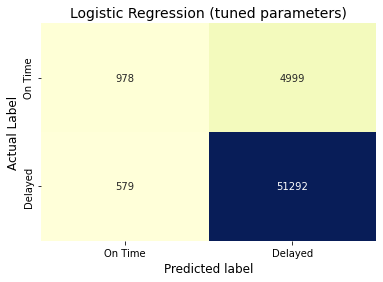

In [82]:
sns.heatmap(pd.DataFrame(cm_lr_tuned), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Logistic Regression (tuned parameters)', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);


We still have a lot of False Positives but False Negatives have decreased quite a lot (almost half of what they were before)

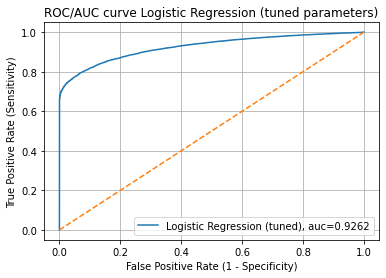

In [83]:
# let's draw our roc/auc curve
lr_tuned_pred_proba = lr_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_tuned_pred_proba)
auc_lr_tuned = metrics.roc_auc_score(y_test, lr_tuned_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression (tuned), auc="+str(round(auc_lr_tuned, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve Logistic Regression (tuned parameters)'); 

ROC AUC score has improved compared with the original model (this is the measure we have chosen to maximize in GridSearch).

In [84]:
# store the results
lr_tuned_results = pd.DataFrame(data = [['Logistic Regression (tuned parameters)', get_results(y_test, lr_tuned_pred)[0],
                                        get_results(y_test, lr_tuned_pred)[1], get_results(y_test, lr_tuned_pred)[2], 
                                        get_results(y_test, lr_tuned_pred)[3], auc_lr_tuned]], columns = ['Model', 
                                        'Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])
results_df = pd.concat([results_df, lr_tuned_results])

results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588
0,Logistic Regression (tuned parameters),0.903575,0.988838,0.911194,0.948429,0.926217


Compared with our original Logistic Regression Model, we have improve Recall and ROC AUC score but the precision has decreased (we have increased false positives: we predicted delay for a lot of flights that actualliy were on time)

#### Logistic Regression with balanced classes

Let´s remember the parameters used in our first model with balanced classes: 

In [85]:
lr_sm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 12,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

This time we will search again to maximize ROC AUC score, we are choosing as tuning parameters solvers and c_values: 

In [86]:
# define models and parameters

model = LogisticRegression(random_state=12)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [10, 20]
penalty = ['l1']

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_sm, y_train_sm)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [87]:
results Best: 0.944532 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Wev have improved ROC AUC score, now let's try the model using these parameters: 

In [88]:
lr_sm_tuned = LogisticRegression(random_state= 12, C =10, penalty = 'l1', solver = 'liblinear')

lr_sm_tuned.fit(X_train_sm, y_train_sm)

LogisticRegression(C=10, penalty='l1', random_state=12, solver='liblinear')

In [89]:
lr_sm_tuned_pred = lr_sm_tuned.predict(X_test)

print_results(y_test, lr_sm_tuned_pred)

Accuracy :  0.8482575024201355
Recall (or sensitivity):  0.8470436274604307
Precision :  0.9811527210200754
F1 score:  0.909179323759467


In [90]:
# check confucion matrix
cm_lr_sm_tuned = confusion_matrix(y_test, lr_sm_tuned_pred)
cm_lr_sm_tuned

array([[ 5133,   844],
       [ 7934, 43937]], dtype=int64)

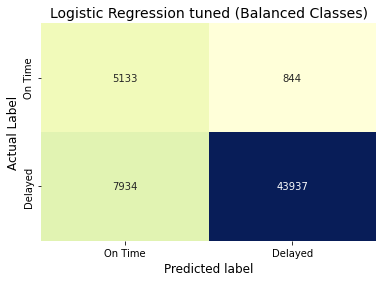

In [109]:
sns.heatmap(pd.DataFrame(cm_lr_sm_tuned), annot = True, fmt='g', cbar = False,  cmap="YlGnBu" , xticklabels= labels, 
            yticklabels= labels)
plt.title('Logistic Regression tuned (Balanced Classes)', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

Maximizing the ROC AUC score has increased the false positives a little, but the false negatives have decreased even more, so that overall the model has been improved.

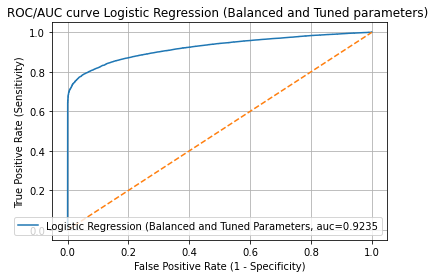

In [96]:
# let's draw our roc/auc curve
lr_sm_tuned_pred_proba = lr_sm_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_sm_tuned_pred_proba)
auc_lr_sm_tuned = metrics.roc_auc_score(y_test, lr_sm_tuned_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression (Balanced and Tuned Parameters, auc="+str(round(auc_lr_sm_tuned, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve Logistic Regression (Balanced and Tuned parameters) '); 

ROC AUC score has increased from 0.9218 to 0.9235. 

In [97]:
# store the results
lr_sm_tuned_results = pd.DataFrame(data=[['Logistic Regression (Balanced and tuned parameters)', 
                                         get_results(y_test, lr_sm_tuned_pred)[0], get_results(y_test, lr_sm_tuned_pred)[1], 
                                         get_results(y_test, lr_sm_tuned_pred)[2], get_results(y_test, lr_sm_tuned_pred)[3], 
                                         auc_lr_sm_tuned]] , columns = ['Model', 'Accuracy', 'Recall', 'Precision', 
                                        'f1-score', 'ROC AUC Score'])

results_df = pd.concat([results_df, lr_sm_tuned_results])
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588
0,Logistic Regression (tuned parameters),0.903575,0.988838,0.911194,0.948429,0.926217
0,Logistic Regression (Balanced and tuned parame...,0.848258,0.847044,0.981153,0.909179,0.923453


Compared with our original Logistic Regression (Balanced) model:  

+ ROC AUC score has improved
+ f1 score and recall have improved too
+ precision has decreased a little 
    

#### Adaboost with Balanced classes

In [98]:
# check previously used params 
ada_sm.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 0}

We will try to change the number of estimators to see if we can improve the model, we will use GridSearch to look for the best parameters, this time we look to maximize F1 score: 

In [99]:
model2 = AdaBoostClassifier(random_state=0)
estimators = [100, 200, 1000]
grid = dict(n_estimators = estimators)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats= 3, random_state=0)
grid_search = GridSearchCV(estimator = model2, param_grid=grid, cv = cv, scoring = 'f1', error_score=0 )
grid_result_ada = grid_search.fit(X_train_sm, y_train_sm)

# summarize results
print("Best: %f using %s" % (grid_result_ada.best_score_, grid_result_ada.best_params_))

Best: 0.893877 using {'n_estimators': 1000}


Now we can apply this new parameter to our model: 

In [100]:
ada_sm_tuned = AdaBoostClassifier(n_estimators=1000, random_state=0)

ada_sm_tuned.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(n_estimators=1000, random_state=0)

In [101]:
ada_sm_tuned_pred = ada_sm_tuned.predict(X_test)

print_results(y_test, ada_sm_tuned_pred)

Accuracy :  0.862968469091412
Recall (or sensitivity):  0.8671512020203967
Precision :  0.9774860917941586
F1 score:  0.9190188686955367


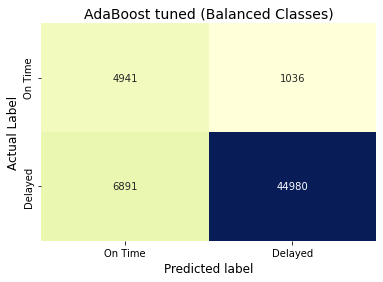

In [110]:
# cm 
cm_ada_sm_tuned = confusion_matrix(y_test, ada_sm_tuned_pred)

sns.heatmap(pd.DataFrame(cm_ada_sm_tuned), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('AdaBoost tuned (Balanced Classes)', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

Compared to the original model : 

+ False positives have increased by 244 observations. 
+ False negatives have been reduced by 1265 observations. 

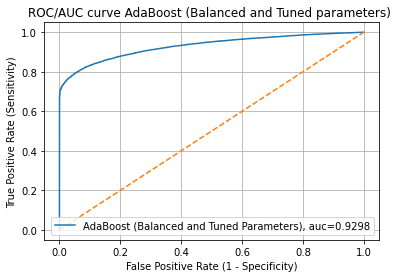

In [111]:
# let's draw our roc/auc curve
ada_sm_tuned_pred_proba = ada_sm_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  ada_sm_tuned_pred_proba)
auc_ada_sm_tuned = metrics.roc_auc_score(y_test, ada_sm_tuned_pred_proba)
plt.plot(fpr,tpr,label="AdaBoost (Balanced and Tuned Parameters), auc="+str(round(auc_ada_sm_tuned, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve AdaBoost (Balanced and Tuned parameters) '); 

In [112]:
# store the results 
ada_tuned_results = pd.DataFrame(data = [['AdaBoost (Balanced and tuned parameters)', 
                                         get_results(y_test, ada_sm_tuned_pred)[0],
                                         get_results(y_test, ada_sm_tuned_pred)[1], 
                                         get_results(y_test, ada_sm_tuned_pred)[2], 
                                         get_results(y_test, ada_sm_tuned_pred)[3], 
                                         auc_ada_sm_tuned]], columns = ['Model', 'Accuracy', 
                                         'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])

results_df = pd.concat([results_df, ada_tuned_results])
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588
0,Logistic Regression (tuned parameters),0.903575,0.988838,0.911194,0.948429,0.926217
0,Logistic Regression (Balanced and tuned parame...,0.848258,0.847044,0.981153,0.909179,0.923453
0,AdaBoost (Balanced and tuned parameters),0.862968,0.867151,0.977486,0.919019,0.929833


Compare with previous results: 

In [117]:
results_df[results_df['Model'].str.contains('AdaBoost')]

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
0,AdaBoost (Balanced and tuned parameters),0.862968,0.867151,0.977486,0.919019,0.929833


+ All parameters except precision have improved 
+ F1 score and ROC AUC score has improved so overall we have a better model now. 

#### Balanced Bagging Classifier 

For this algorithm we will try to maximize the f1 score, let´s check the default parameters: 

In [103]:
balanced.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': 0,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(random_state=0),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'replacement': False,
 'sampler': None,
 'sampling_strategy': 'auto',
 'v

Since computing time is very slow with this algorithm, this time we will cange this parameters manually and check if our results are improved. We will select the most important parameters:  

+ Inside RandomForest estimator we will choose max_features : 30
+ In BalancedBaggingClassifier we will use n_estimators : 50

In [21]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

balanced_tuned = BalancedBaggingClassifier(base_estimator= RandomForestClassifier(random_state=0, max_features=30), 
                              sampling_strategy='auto', replacement= False, random_state=0, n_estimators = 100)

balanced_tuned.fit(X_train, y_train)   

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(max_features=30,
                                                                random_state=0),
                          n_estimators=100, random_state=0)

In [22]:
balanced_tuned_pred = balanced_tuned.predict(X_test)

In [125]:
print_results(y_test, balanced_tuned_pred)

Accuracy :  0.8329069285022819
Recall (or sensitivity):  0.8223670258911531
Precision :  0.9895149504743789
F1 score:  0.898231206569804


In [122]:
# see previous results
results_df[3:4]

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588


All metrics except for Precision have improved a little!!

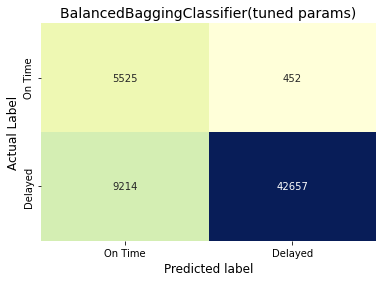

In [25]:
#cm 
cm_balanced_tuned = confusion_matrix(y_test, balanced_tuned_pred)
labels = ['On Time', 'Delayed']
sns.heatmap(pd.DataFrame(cm_balanced_tuned), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('BalancedBaggingClassifier(tuned params)', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

Although we see the metrics have improved a little (except for precision), looking at confusion matrix we realize is more or less very similar as it was before.  

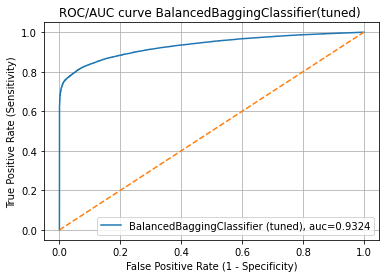

In [126]:
# check roc auc score 

balanced_tuned_pred_proba = balanced_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  balanced_tuned_pred_proba)
auc_balanced_tuned = metrics.roc_auc_score(y_test, balanced_tuned_pred_proba)
plt.plot(fpr,tpr,label="BalancedBaggingClassifier (tuned), auc="+str(round(auc_balanced_tuned, 4)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc=4)
plt.title('ROC/AUC curve BalancedBaggingClassifier(tuned) '); 


In [129]:
bal_tuned_results = pd.DataFrame(data = [['BalancedBaggingClassifier (tuned)', 
                                         get_results(y_test, balanced_tuned_pred)[0], 
                                         get_results(y_test, balanced_tuned_pred)[1], 
                                         get_results(y_test, balanced_tuned_pred)[2], 
                                         get_results(y_test, balanced_tuned_pred)[3], 
                                         auc_balanced_tuned]], columns = ['Model', 
                                        'Accuracy', 'Recall', 'Precision', 'f1-score', 'ROC AUC Score'])
results_df = pd.concat([results_df, bal_tuned_results])
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
0,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588
0,Logistic Regression (tuned parameters),0.903575,0.988838,0.911194,0.948429,0.926217
0,Logistic Regression (Balanced and tuned parame...,0.848258,0.847044,0.981153,0.909179,0.923453
0,AdaBoost (Balanced and tuned parameters),0.862968,0.867151,0.977486,0.919019,0.929833
0,BalancedBaggingClassifier (tuned),0.832907,0.822367,0.989515,0.898231,0.932421


By tuning the parameters we have managed to slightly improve the models, but we still have the problem that the model is not adequate to make good predictions for both classes: if it predicts well one class it has not so good results in the other class. 

In [130]:
# save df
#results_df.to_csv('results_df.csv', index = False)

### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

We will do cross validation for the models, we will use the F1 score as being a harmonic mean of the precision and recall, it is a good metric to compare models. 

#### Model Logistic Regression

In [137]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import f1_score, make_scorer


# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=12)

model =  LogisticRegression()

# evaluate model
scores1 = cross_val_score(model, X, y, scoring = 'f1', cv=cv)

# report performance
print('f1-score: %.3f (%.3f)' % (mean(scores1), std(scores1)))

f1-score: 0.948 (0.001)


In [132]:
results_df[0:1]

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043


Doing Cross Validation we got a f1-score of 0.948, so the result is very good (the sta deviation of the result is 0.001, so the variation is very small). The result is very similar to our original model so our model doesn' t suffer from overfitting

In [139]:
cv_lr = mean(scores1)
cv_lr

0.9479259261019816

In [141]:
cv_results = pd.DataFrame(data = [['Logistic Regression', cv_lr]], columns = ['Model', 'f1-score'])

cv_results

,Model,f1-score
0,Logistic Regression,0.947926


#### Model Logistic Regression Balanced Classes

In [142]:
# evaluate model 
# use the same cv parameters as above
scores2 = cross_val_score(lr_sm, X_train_sm, y_train_sm, scoring = 'f1', cv=cv )

# report performance
print('f1-score: %.3f (%.3f)' % (mean(scores2), std(scores2)))

f1-score: 0.868 (0.005)


In [134]:
results_df[1:2]

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression (Balanced),0.82314,0.813749,0.986676,0.891908,0.921749


Our Cross Validation f1 score is a little lower but difference is not so significant (0.892 against 0.868). 

In [143]:
cv_lr_balanced = mean(scores2)
cv_lr_balanced

0.8678508789656105

In [144]:
#store results
cv_results2 = pd.DataFrame(data = [['Logistic Regression (Balanced)', cv_lr_balanced]], columns = ['Model', 'f1-score'])

cv_results = pd.concat([cv_results, cv_results2])

cv_results

,Model,f1-score
0,Logistic Regression,0.947926
0,Logistic Regression (Balanced),0.867851


#### Model AdaBoostClassifier

In [145]:
scores3 = cross_val_score(ada_sm, X_train_sm, y_train_sm, scoring = 'f1', cv=cv )

# report performance
print('f1-score: %.3f (%.3f)' % (mean(scores3), std(scores3)))

f1-score: 0.884 (0.004)


In [146]:
results_df[2:3]

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512


F1 score in Cross Validation drops a little but the difference is not very significant: 

+ Model F1 score : 0.907
+ CV F1 score : 0.884

In [147]:
cv_ada = mean(scores3)

In [148]:
cv_results3 = pd.DataFrame(data = [['AdaBoost (Balanced)', cv_ada]], columns = ['Model', 'f1-score'])

cv_results = pd.concat([cv_results, cv_results3])
cv_results

,Model,f1-score
0,Logistic Regression,0.947926
0,Logistic Regression (Balanced),0.867851
0,AdaBoost (Balanced),0.884239


#### Model Decision Tree Classifier using BalancedBaggingClassifier

In [149]:
# use the same cross validation parameters as above 
scores4 = cross_val_score(balanced, X, y, scoring = 'f1', cv=cv )

# report performance
print('f1-score: %.3f (%.3f)' % (mean(scores4), std(scores4)))

f1-score: 0.896 (0.002)


In [151]:
cv_balanced = mean(scores4)
cv_balanced

0.8956948980291399

In [152]:
results_df[3:4]

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588


In this case F1 score in Cross Validation and in the model is the same. 

In [153]:
cv_results4 = pd.DataFrame(data = [['Balanced Bagging Classifier', cv_balanced]], columns = ['Model', 'f1-score'])

cv_results = pd.concat([cv_results, cv_results4])
cv_results

,Model,f1-score
0,Logistic Regression,0.947926
0,Logistic Regression (Balanced),0.867851
0,AdaBoost (Balanced),0.884239
0,Balanced Bagging Classifier,0.895695


#### Plotting these results 

Now we will do a plot with the comparison between F1 score in Cross Validation and in the different models: 

In [155]:
# save df
#cv_results.to_csv('cv_results.csv', index = False)

In [42]:
# open dataframe with cross validation results
cv_results = pd.read_csv('cv_results.csv')
cv_results

,Model,f1-score
0,Logistic Regression,0.947926
1,Logistic Regression (Balanced),0.867851
2,AdaBoost (Balanced),0.884239
3,Balanced Bagging Classifier,0.895695


In [43]:
# change name of the column 
cv_results.rename(columns = {'f1-score': 'CV f1-score', 'Model': 'CV Model'}, inplace = True)
cv_results

,CV Model,CV f1-score
0,Logistic Regression,0.947926
1,Logistic Regression (Balanced),0.867851
2,AdaBoost (Balanced),0.884239
3,Balanced Bagging Classifier,0.895695


In [44]:
# we will merge our CV results with our results from the model 
# open results df
results_df = pd.read_csv('results_df.csv')
results_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043
1,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749
2,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512
3,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588
4,Logistic Regression (tuned parameters),0.903575,0.988838,0.911194,0.948429,0.926217
5,Logistic Regression (Balanced and tuned parame...,0.848258,0.847044,0.981153,0.909179,0.923453
6,AdaBoost (Balanced and tuned parameters),0.862968,0.867151,0.977486,0.919019,0.929833
7,BalancedBaggingClassifier (tuned),0.832907,0.822367,0.989515,0.898231,0.932421


In [45]:
results = results_df[0:4]

In [48]:
compare_df = pd.concat([results, cv_results], axis = 1)
compare_df

,Model,Accuracy,Recall,Precision,f1-score,ROC AUC Score,CV Model,CV f1-score
0,Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043,Logistic Regression,0.947926
1,Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749,Logistic Regression (Balanced),0.867851
2,AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512,AdaBoost (Balanced),0.884239
3,Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588,Balanced Bagging Classifier,0.895695


In [49]:
# plot comparison between f1 score on models and f1 score on cross-validation 
plot_results2 = compare_df.set_index('Model')
plot_results2

,Accuracy,Recall,Precision,f1-score,ROC AUC Score,CV Model,CV f1-score
Model,,,,,,,
Logistic Regression,0.905909,0.979545,0.920604,0.949161,0.926043,Logistic Regression,0.947926
Logistic Regression (Balanced),0.823140,0.813749,0.986676,0.891908,0.921749,Logistic Regression (Balanced),0.867851
AdaBoost (Balanced),0.845319,0.842764,0.982205,0.907157,0.926512,AdaBoost (Balanced),0.884239
Balanced Bagging Classifier,0.829156,0.817393,0.990399,0.895618,0.933588,Balanced Bagging Classifier,0.895695


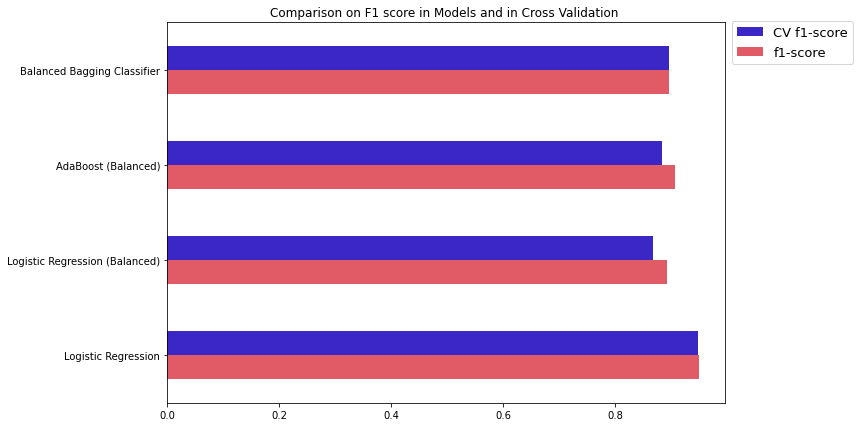

In [60]:
ax = plot_results2[['f1-score', 'CV f1-score']].plot(kind = 'barh', figsize = (10,7), color = ['#e05b66', '#3b27c6'])
ax.set_title('Comparison on F1 score in Models and in Cross Validation ')
ax.set_ylabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02), prop={'size': 13}); 

+ We observe that for most models Cross Validation f1 score is a litlle lower than X_test f1-score. 
+ This diference is not significant, so we can state that our models does'nt suffer from overfitting. 

#### This exercise is continued on another Notebook in the same Github repository